# Data Analyst Practical Exam Submission

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
file = 'product_sales.csv'
original_data = pd.read_csv(file, sep=',')

## Data Validation

We will check for duplicated rows or missing values.
There are no duplicated rows, and there are 1074 missing values in the column revenue.

Next, we will analyse every column separately:
- week: int, values range from 1 to 6 and there is nothing odd.
- sales_method: str, there are 5 categories but it should be 3 according to the notes. So, we merge 'Email' and 'email' and we do  same with 'em + call' and 'Email + Call'
- customer_id: str, every customer id is different.
- nb_sold: int, the number new products sold looks fine, ranges from 7 to 16.
- revenue: real, this column has 1074 missing values. I decided that the best approach to handle these missing values would be to replace them by the mean revenue corresponding to each type of sales_method.
- years_as_customer: int, there are two points which makes to sense, since the company is 40 years old, and there are two customer, one from 63 and other from 47 years ago. Since the rest of value are fine, we will not remove those.
- nb_site_vists: int, has 0 missing values and all data is valid.
- state: str, looks fine. There are more sales in the coastside states than in the middle and north states.
        


In [5]:
original_data.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [6]:
original_data.shape

(15000, 8)

In [7]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [8]:
original_data.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [9]:
# Define a mapping dictionary to correct the inconsistent values
sales_method_mapping = {
    'Email': 'Email',
    'Call': 'Call',
    'Email + Call': 'Email + Call',
    'em + call': 'Email + Call',
    'email': 'Email'
}

# Apply the mapping to the 'sales_method' column
original_data['sales_method'] = original_data['sales_method'].map(sales_method_mapping)


In [10]:
# find mean revenue for each sales method
mean_revenue_by_sales_method = original_data.groupby('sales_method')['revenue'].mean()


def replace_null_revenue(row):
    """
    Replaces null (NaN) values in the 'revenue' column of a pandas DataFrame with the mean (or median) revenue
    for the corresponding 'sales_method' group.
    """
    
    if pd.isnull(row['revenue']):
        return mean_revenue_by_sales_method[row['sales_method']]
    else:
        return row['revenue']

# apply function to the revenue column
original_data['revenue'] = original_data.apply(replace_null_revenue, axis=1)

# check for any null values in the revenue column
print(original_data['revenue'].isnull().sum())

0


In [11]:
original_data[original_data['years_as_customer'] > 39]
# find all values > 39 and replace with 39
original_data.loc[original_data['years_as_customer'] > 39, 'years_as_customer'] = 39
# check to see if replacement worked
original_data[original_data['years_as_customer'] > 39]
# check number of unique values for state
original_data['state'].nunique()
# check if any duplicate rows
duplicate_rows = original_data[original_data.duplicated()]
duplicate_rows

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


## Exploratory analysis

Once the data has been cleaned up, we are able to proceed with the explorory analysis.

We will be addressing the points the Sales Rep required:

- How many customers were there for each approach?
 
In this case, the answer, is just counting the number of customers for each method of sales. You can see the result in this barchart:

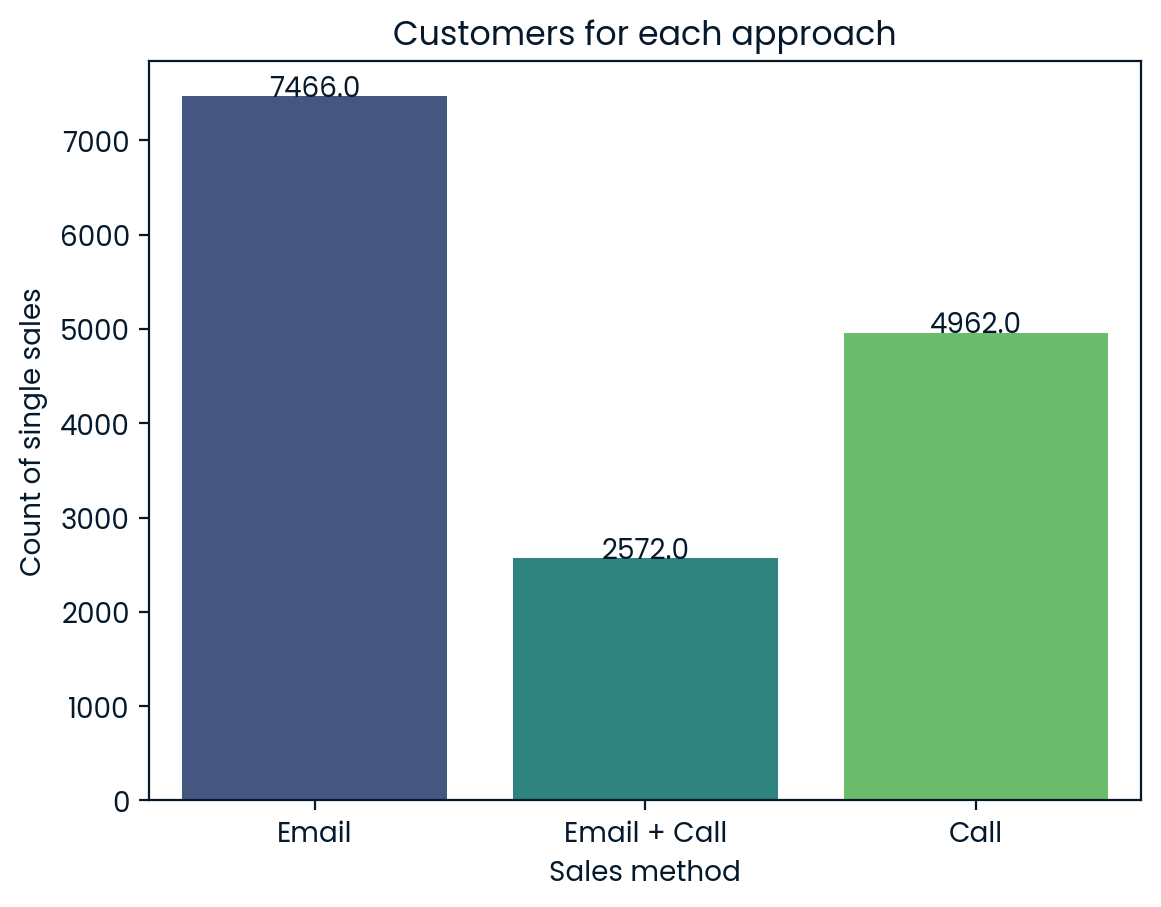

In [12]:
ax = sns.countplot(x="sales_method", data=original_data, palette="viridis")


fig = plt.gcf()


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height}', ha="center")


plt.title("Customers for each approach")
plt.xlabel('Sales method')
plt.ylabel('Count of single sales')
plt.show()

- What does the spread of the revenue look like overall? And for each method?

The absolute and percentage spread of revenue por every sales method is:

1. Call: $ 236,445.16 (16.49%)
2. Email: $ 724,313.35 (50.53%)
3. Email + Call: $ 472,730.95 (32.98%)

As we can observe, the most significant sales method is 'Email', accounting for over half of the total income, followed by 'Email + Call' with almost 33%, and 'Call' is the least, contributing 16.49%.

Next, we will examine the distribution of individual sales, initially without distinguishing by sales method and subsequently differentiating by sales method using various colors.



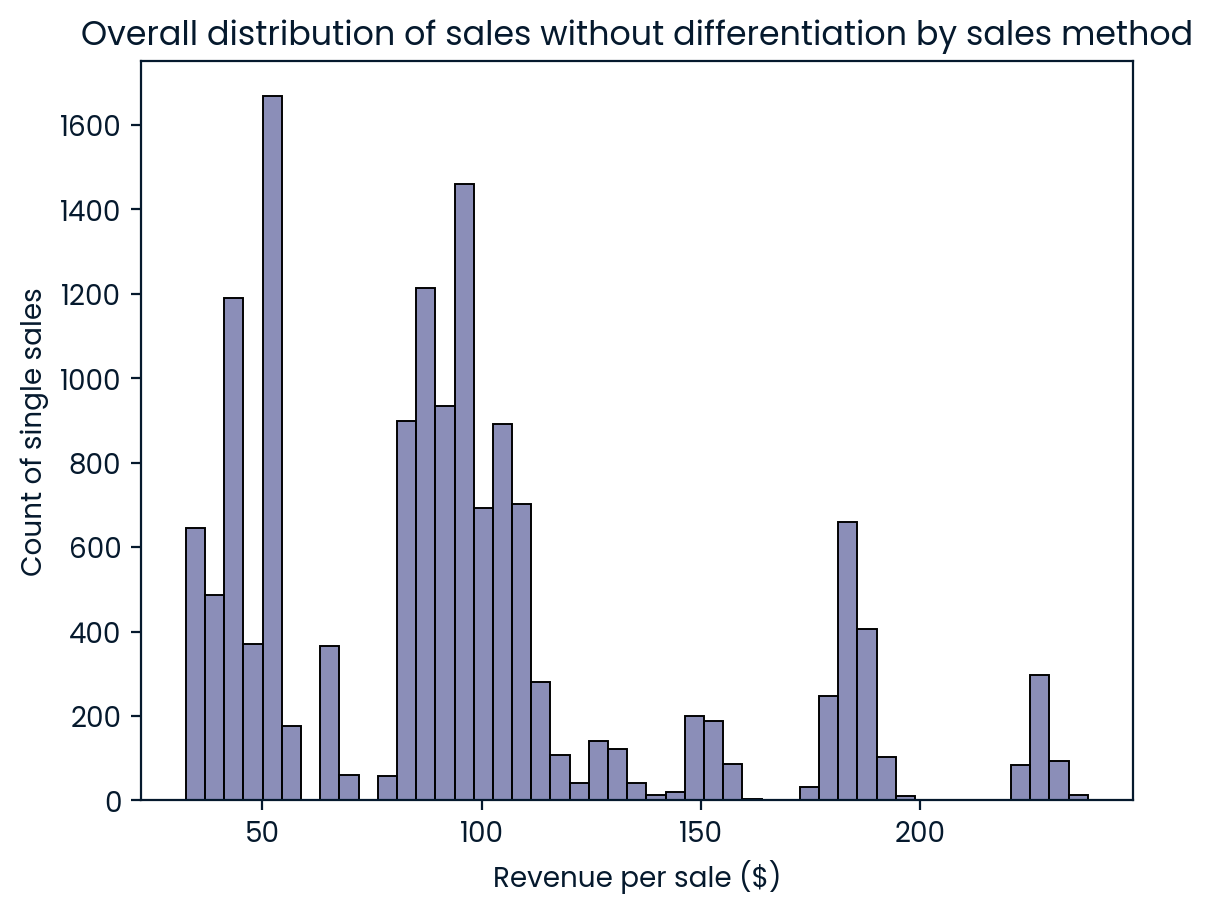

In [13]:
sns.histplot(data=original_data,x="revenue")
plt.xlabel('Revenue per sale ($)')
plt.ylabel('Count of single sales')
plt.title("Overall distribution of sales without differentiation by sales method")
plt.show()

Observing this histogram, we can understand there are different segments in this customer sample. We can observe one group around 50, then another around 100 and the last one over 150. Most of the observations are around 100.

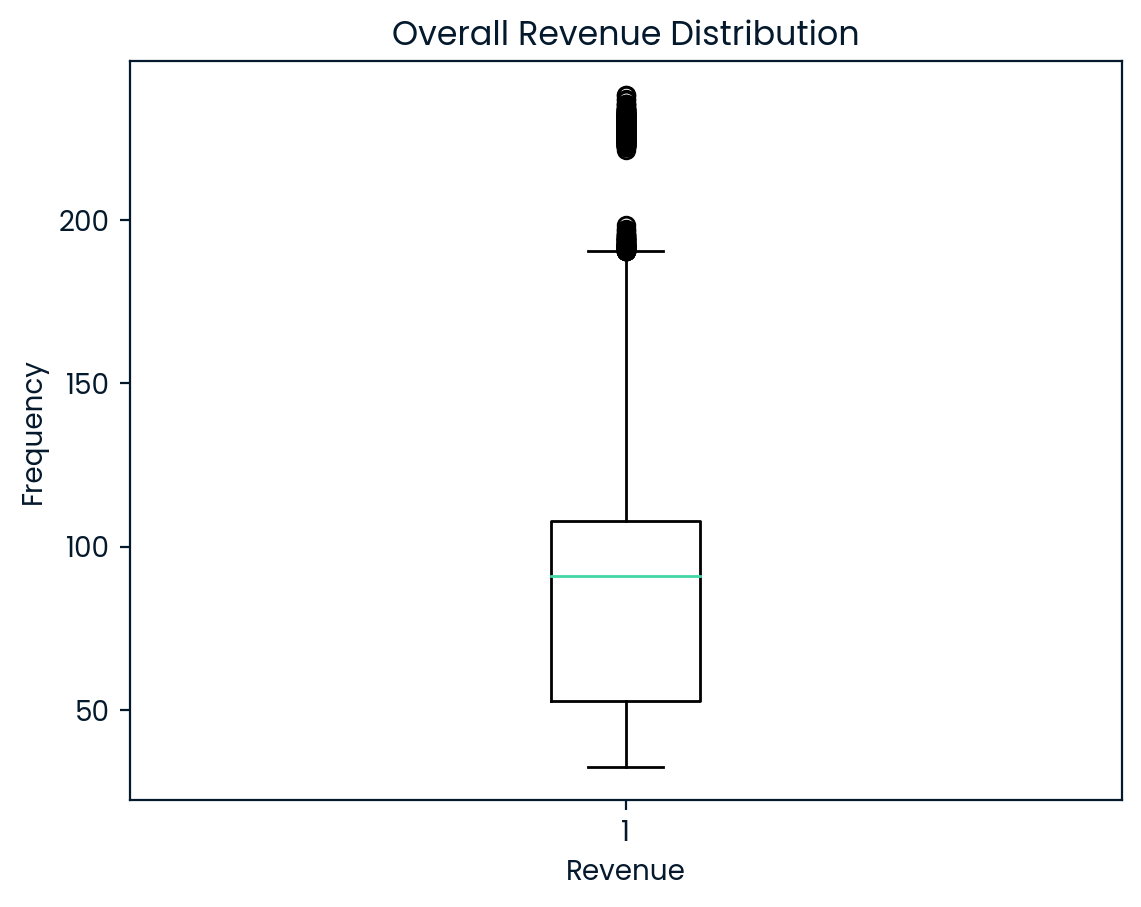

In [14]:
# Boxplot for overall revenue
plt.boxplot(original_data['revenue'])
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Overall Revenue Distribution')
plt.show()

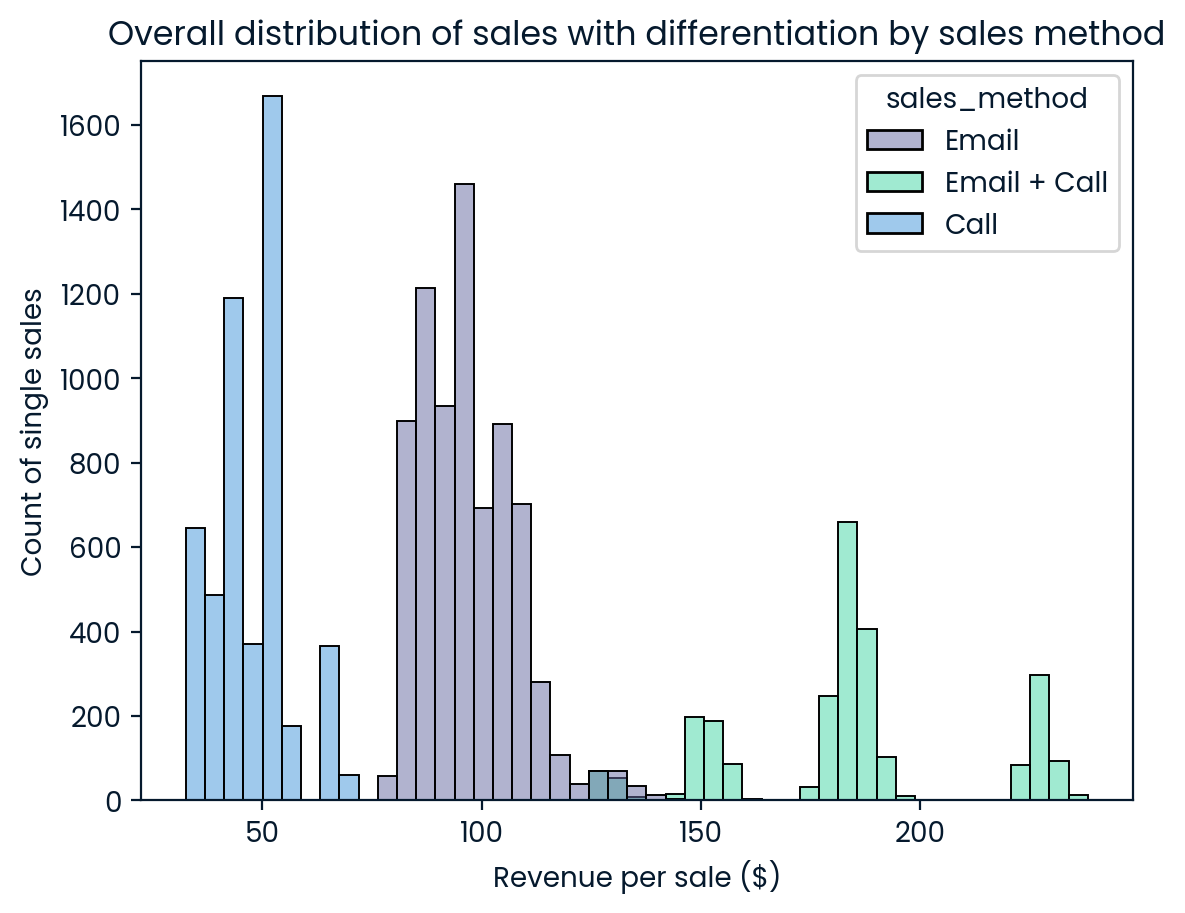

In [15]:
sns.histplot(data=original_data,x="revenue",hue="sales_method")
plt.xlabel('Revenue per sale ($)')
plt.ylabel('Count of single sales')
plt.title("Overall distribution of sales with differentiation by sales method")
plt.show()

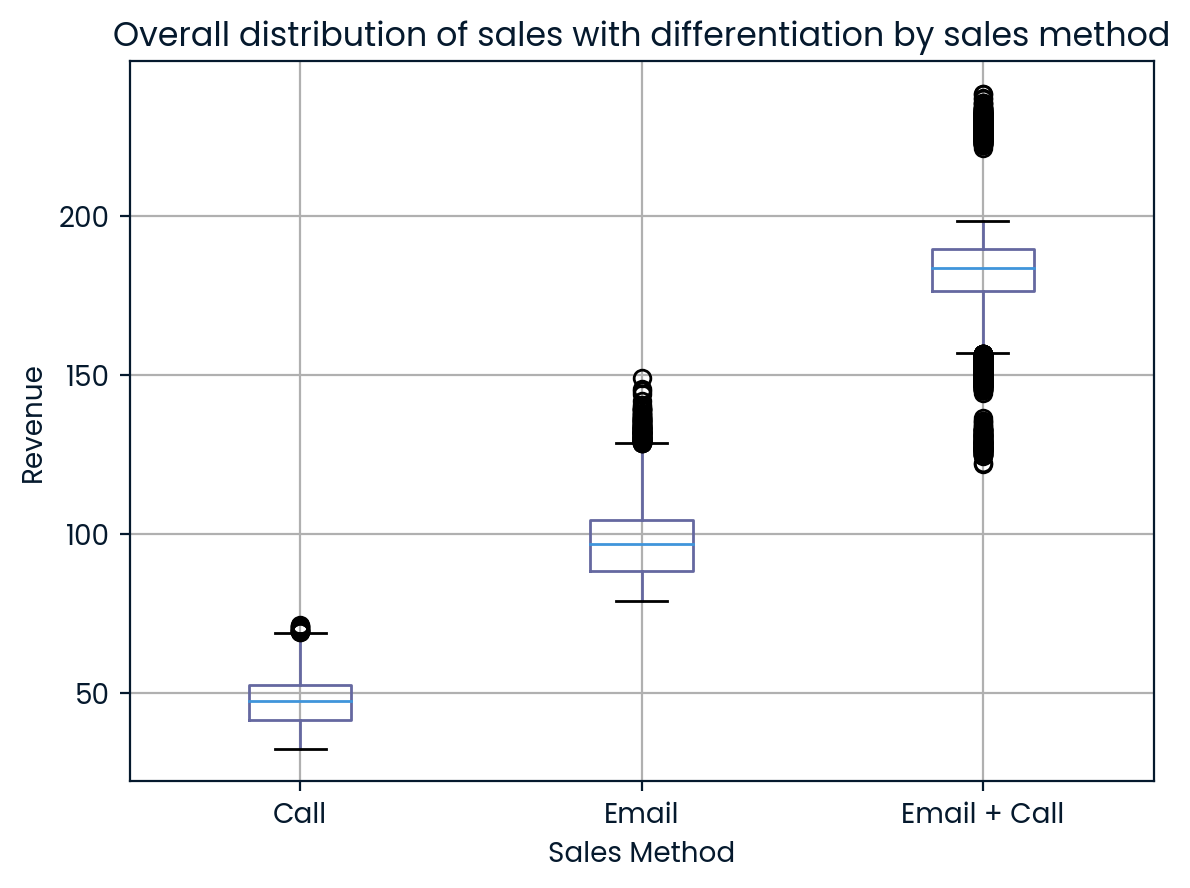

In [16]:
original_data.boxplot(column='revenue', by='sales_method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.title('Overall distribution of sales with differentiation by sales method')
plt.suptitle('')  # Remove auto-generated sup-title
plt.show()


 In this histogram and this boxplot, we can observe:

**Call Method:**

Generates the lowest revenue per sale, indicating it may be more suited for routine or lower-value transactions.

**Email Method:**

Delivers nearly double the revenue per sale compared to calls, despite its lower operational cost. This efficiency makes it a high-priority strategy for the sales team.

**Email + Call Method:**

Shows less consistency in revenue distribution but achieves the highest revenue per sale. This likely reflects a tailored, high-touch approach that drives premium outcomes.

Now we have a clear idea of the revenue distribution of the three sales methods. The next variable to observe is time:

- Was there any difference in revenue over time for each of the methods?

To answer this question, we have created a graph of total revenue per week for each sales method, so we can clearly see the evolution over time:

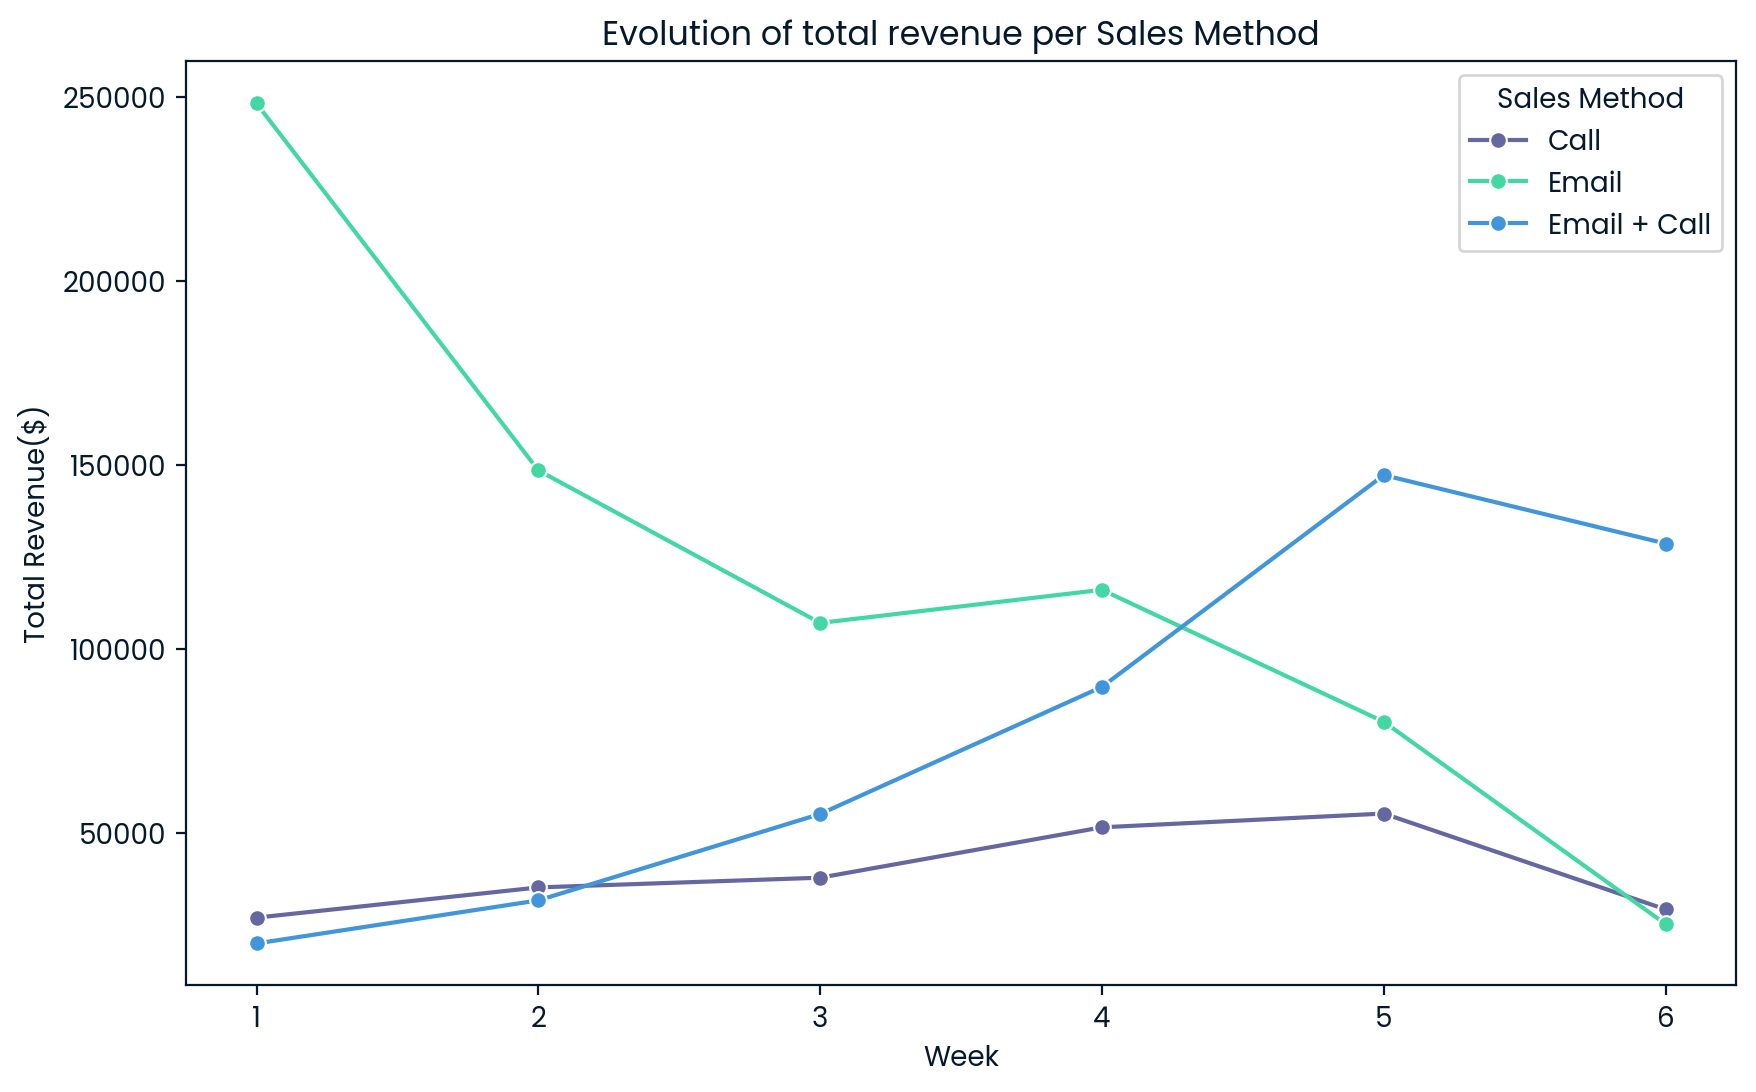

In [17]:

grouped_data = original_data.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='week', y='revenue', hue='sales_method', marker='o')


plt.title('Evolution of total revenue per Sales Method')
plt.xlabel('Week')
plt.ylabel('Total Revenue($)')
plt.legend(title='Sales Method')


plt.show()

Sales Method Performance Over Time:
**Call Method:**

Revenue remains stable but consistently lower compared to other methods, suggesting limited growth potential.

**Email Method:**

Demonstrates strong initial performance but experiences a significant decline over time, nearly diminishing to zero by the end of the cycle. This decline in revenue overtime could indicate diminishing returns from the Email sales method as time goes on.

**Email + Call Method:**

The only method showing steady growth. It's possible that this method would be the most beneficial in terms of long-term revenue growth compared to the two other sales methods.

The Email + Call sales method appears to be the most promising in terms of long-term revenue generation, although it does require more effort from the sales team. The Email method starts strong but shows a steady decline, while the Call method has an overall increasing trend but fluctuates more. It is recommended to consider the efficiency and effort required for each method while making a decision on which sales method to continue using.

In addition to these points, we have also analyzed 'years_as_customer' and 'nb_site_visits':

- For 'years_as_customer', we observed that most of the revenue comes from customers who have been with us for 5 years or less.
- Regarding 'nb_site_visits', we found that customers who regularly visit the website are more likely to make purchases. However, we do not consider this to be the most significant metric.
- As for 'state', although the distribution is relatively uniform, our analysis indicates that coastal and southern states tend to have better customers than those in the middle and northern regions.


**Other differences between customers in each group:**

Looking at the charts below we can make some interesting observations:

-The duration of customer relationships was relatively consistent across all sales methods.
-Email + Call: Customers purchased an average of 12 items (range: 10–13), outperforming both Email (8–11 items) and Call (9–11 items). This suggests that combining email and calls drives higher transaction volumes, potentially boosting revenue.
-Customers contacted via Email + Call had more site visits on average than those reached through Email or Call alone. This correlation implies that the combined method encourages greater online interaction, which may further enhance sales.

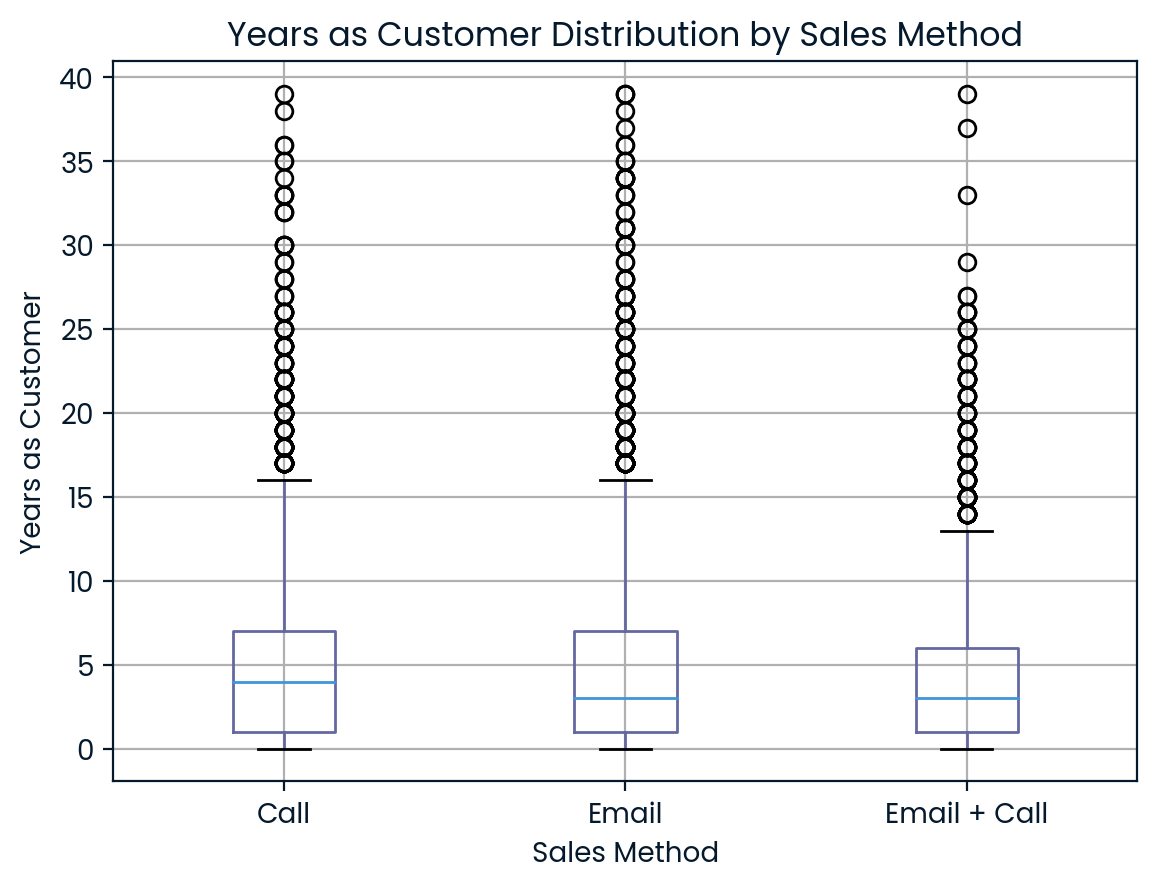

In [18]:
# Example: Boxplot for years_as_customer by sales_method
original_data.boxplot(column='years_as_customer', by='sales_method')
plt.xlabel('Sales Method')
plt.ylabel('Years as Customer')
plt.title('Years as Customer Distribution by Sales Method')
plt.suptitle('')  # Remove auto-generated sup-title
plt.show()

# Other comparisons can be performed similarly (e.g., nb_site_visits, state, etc.)

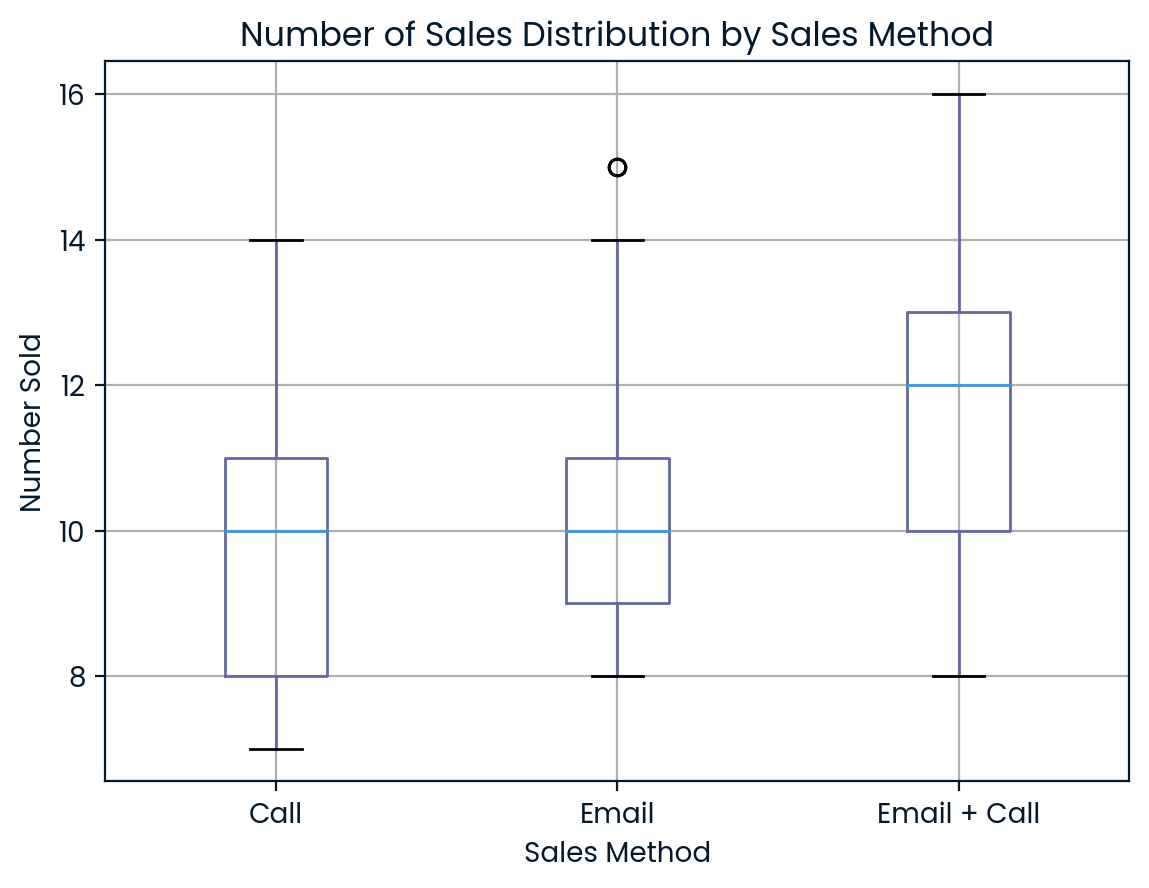

In [19]:
# Example: Boxplot for years_as_customer by sales_method
original_data.boxplot(column='nb_sold', by='sales_method')
plt.xlabel('Sales Method')
plt.ylabel('Number Sold')
plt.title('Number of Sales Distribution by Sales Method')
plt.suptitle('')  # Remove auto-generated sup-title
plt.show()

# Other comparisons can be performed similarly (e.g., nb_site_visits, state, etc.)

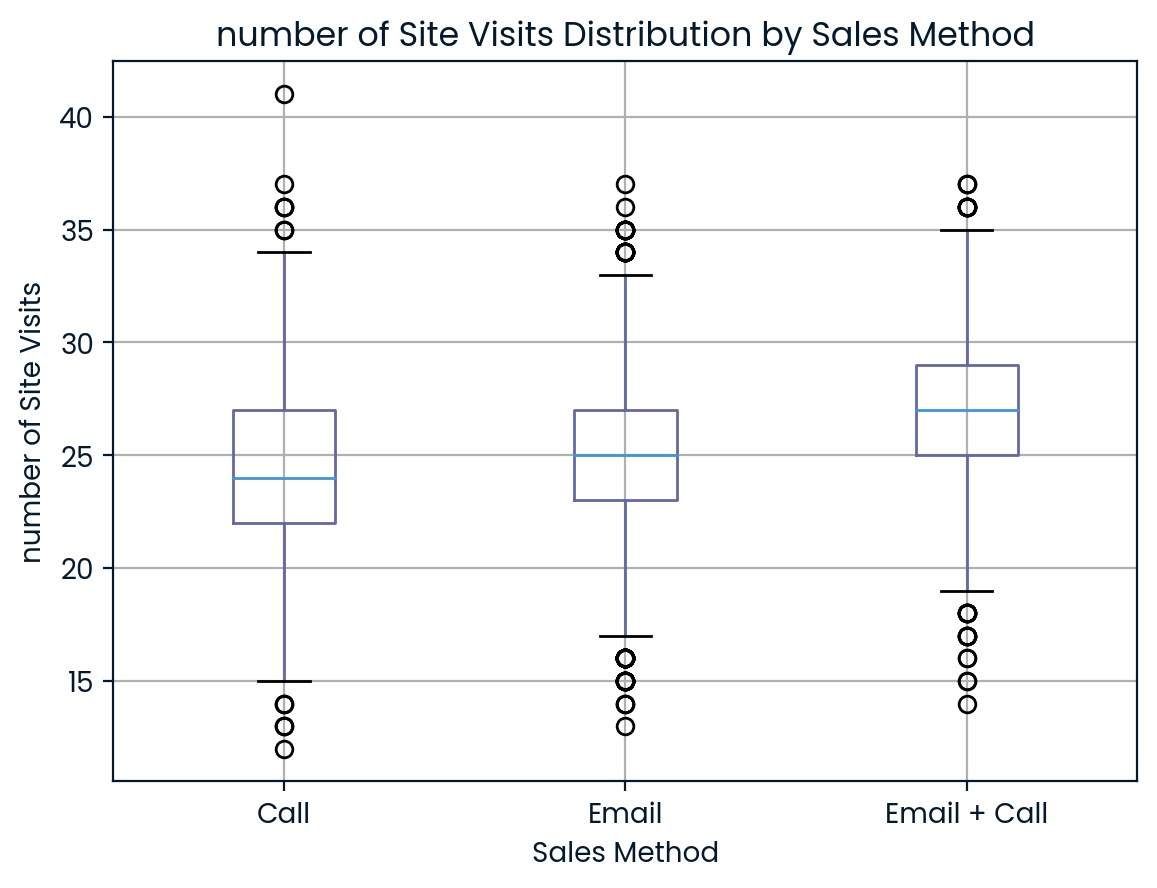

In [20]:
# Example: Boxplot for years_as_customer by sales_method
original_data.boxplot(column='nb_site_visits', by='sales_method')
plt.xlabel('Sales Method')
plt.ylabel('number of Site Visits')
plt.title('number of Site Visits Distribution by Sales Method')
plt.suptitle('')  # Remove auto-generated sup-title
plt.show()

# Other comparisons can be performed similarly (e.g., nb_site_visits, state, etc.)

## Metric for the business

To get a better understanding of the performance of each sales method I create a metric called Average Revenue per Customer Sales Effort(ARPSE). This metric takes into account the difficulty of each sales method in terms of time spent with email having a value of 0.5, email + call 1 and call 3.

**ARPCSE = (Total Revenue for Method) / (Number of customers * Sales effort)**

In [21]:
# Define the sales effort for each sales method
sales_effort = {
    'Email': 0.5,
    'Call': 3,
    'Email + Call': 1
}

# Group the data by sales_method and aggregate the total revenue and number of customers
grouped_data = original_data.groupby('sales_method').agg({'revenue': 'sum', 'customer_id': 'count'}).reset_index()

# Calculate ARCPSE for each sales method
grouped_data['ARCPSE'] = grouped_data.apply(lambda row: row['revenue'] / (row['customer_id'] * sales_effort[row['sales_method']]), axis=1)

# Display the ARCPSE for each sales method
print(grouped_data[['sales_method', 'ARCPSE']])

   sales_method      ARCPSE
0          Call   15.865822
1         Email  194.255368
2  Email + Call  183.651233


The ARCPSE results show that Email has the highest value with 194.25, followed by Email + Call with 183.65 and finally call with 15.86. This suggests that the call method is the most efficient in terms of revenue generated per unit of effort.

However, it is important to note that additional factors have been observed. The 'Email + Call' method had customers with more website visits and higher average number of items purchased. Moreover, this method demonstrated a steady increase in revenue growth over the six-week period. In contrast, the 'Call' method showed high revenue in week 1 but decreased over time.

## Summary

The main purpose of this report is to help the company obtain better information on which sales method to use for new products. We understand that this is a crucial aspect of the business, as it fosters trust in continuous innovation and keeps customers satisfied by working with a company that is always evolving.

Our recommendations for the company, based on the findings from our data analysis, are as follows:

- We should discontinue using the 'Call' method as a primary source of income. It requires the most labor hours, yields the lowest unit price, and generates the least total revenue.
- We believe we should continue utilizing the 'Email' method, as it proves most effective for early adopters.
- The best method to invest in appears to be 'Email + Call'.It has shown a consistent upward trend in revenue generation over six weeks, indicating its potential for continued success. Our analysis suggests that customers who were only contacted via call would have placed larger orders if the approach had been 'Email + Call'. Given its positive sales trend over time, this method is our best option.

In conclusion, the 'Email + Call' method should be prioritized for sales efforts, as it demonstrates better customer engagement, consistent revenue growth, and a more sustainable balance between effort and return.